In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_rows = 1000

df = pd.read_csv("mpls_crime_2017-2022.csv", encoding="utf-8")

In [4]:
df.sample(n=5)

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear
3402,3403,STANDISH,Auto Theft,NaN,12,2017
2972,2973,DOWNTOWN EAST,Homicide,NaN,12,2017
39741,39742,King Field,Larceny,11.0,4,2022
18336,18337,Bottineau,Aggravated Assault,1.0,10,2019
13467,13468,Central,Burglary,4.0,3,2019


In [5]:
before = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020)  ]
after = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020)  ]

In [6]:
before.sort_values(by=["neighborhood", "ucrDescription"])
after.sort_values(by=["neighborhood", "ucrDescription"])

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear
23936,23937,Armatage,Aggravated Assault,1.0,6,2020
23937,23938,Armatage,Arson,0.0,6,2020
23938,23939,Armatage,Auto Theft,2.0,6,2020
23939,23940,Armatage,Burglary,1.0,6,2020
23940,23941,Armatage,Homicide,0.0,6,2020
23941,23942,Armatage,Larceny,1.0,6,2020
23942,23943,Armatage,Rape,0.0,6,2020
23943,23944,Armatage,Robbery,0.0,6,2020
23944,23945,Audubon Park,Aggravated Assault,1.0,6,2020
23945,23946,Audubon Park,Arson,0.0,6,2020


In [7]:
before_grp = before.groupby(["neighborhood", "ucrDescription"])
after_grp = after.groupby(["neighborhood", "ucrDescription"])

In [8]:
before_agg = before_grp["number"].sum()
after_agg = after_grp["number"].sum()

In [10]:
before_agg.head(10)

neighborhood  ucrDescription    
Armatage      Aggravated Assault    1.0
              Arson                 0.0
              Auto Theft            0.0
              Burglary              6.0
              Homicide              0.0
              Larceny               2.0
              Rape                  0.0
              Robbery               0.0
Audubon Park  Aggravated Assault    0.0
              Arson                 0.0
Name: number, dtype: float64

In [11]:
after_agg.head(10)

neighborhood  ucrDescription    
Armatage      Aggravated Assault    1.0
              Arson                 0.0
              Auto Theft            2.0
              Burglary              1.0
              Homicide              0.0
              Larceny               1.0
              Rape                  0.0
              Robbery               0.0
Audubon Park  Aggravated Assault    1.0
              Arson                 0.0
Name: number, dtype: float64

<AxesSubplot:xlabel='neighborhood'>

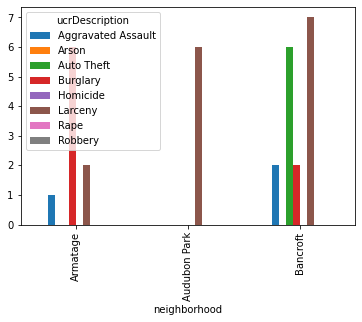

In [12]:
before_agg[:24].unstack().plot.bar()

<AxesSubplot:xlabel='neighborhood'>

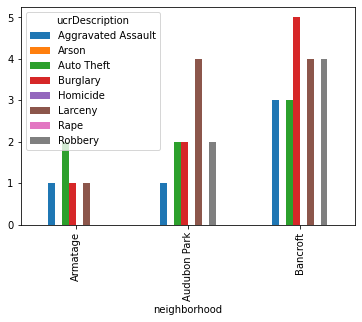

In [13]:
after_agg[:24].unstack().plot.bar()

In [14]:
violent_crimes = ["Aggravated Assault", "Homicide", "Rape", "Robbery"]

before_violent = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]
after_violent = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]

In [15]:
property_crimes = ["Arson", "Auto Theft", "Burglary", "Larceny"]

before_property = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]
after_property = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]

In [16]:
before_property.sort_values(by=["neighborhood", "ucrDescription"])
after_property.sort_values(by=["neighborhood", "ucrDescription"])

before_violent.sort_values(by=["neighborhood", "ucrDescription"])
after_violent.sort_values(by=["neighborhood", "ucrDescription"])

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear
23936,23937,Armatage,Aggravated Assault,1.0,6,2020
23940,23941,Armatage,Homicide,0.0,6,2020
23942,23943,Armatage,Rape,0.0,6,2020
23943,23944,Armatage,Robbery,0.0,6,2020
23944,23945,Audubon Park,Aggravated Assault,1.0,6,2020
23948,23949,Audubon Park,Homicide,0.0,6,2020
23950,23951,Audubon Park,Rape,0.0,6,2020
23951,23952,Audubon Park,Robbery,2.0,6,2020
23952,23953,Bancroft,Aggravated Assault,3.0,6,2020
23956,23957,Bancroft,Homicide,0.0,6,2020


In [17]:
before_property_grp = before.groupby(["neighborhood", "ucrDescription"])
after_property_grp = after.groupby(["neighborhood", "ucrDescription"])

before_violent_grp = before.groupby(["neighborhood", "ucrDescription"])
after_violent_grp = after.groupby(["neighborhood", "ucrDescription"])

In [18]:
before_property_agg = before_grp["number"].sum()
after_property_agg = after_grp["number"].sum()

before_violent_agg = before_grp["number"].sum()
after_violent_agg = after_grp["number"].sum()

In [20]:
after_violent_agg.head(10)

neighborhood  ucrDescription    
Armatage      Aggravated Assault    1.0
              Arson                 0.0
              Auto Theft            2.0
              Burglary              1.0
              Homicide              0.0
              Larceny               1.0
              Rape                  0.0
              Robbery               0.0
Audubon Park  Aggravated Assault    1.0
              Arson                 0.0
Name: number, dtype: float64

In [21]:
before_violent_agg.head(10)

neighborhood  ucrDescription    
Armatage      Aggravated Assault    1.0
              Arson                 0.0
              Auto Theft            0.0
              Burglary              6.0
              Homicide              0.0
              Larceny               2.0
              Rape                  0.0
              Robbery               0.0
Audubon Park  Aggravated Assault    0.0
              Arson                 0.0
Name: number, dtype: float64

<AxesSubplot:xlabel='neighborhood'>

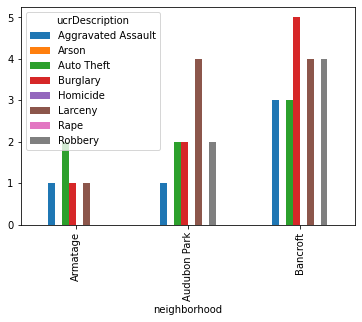

In [22]:
after_violent_agg[:24].unstack().plot.bar()

<AxesSubplot:xlabel='neighborhood'>

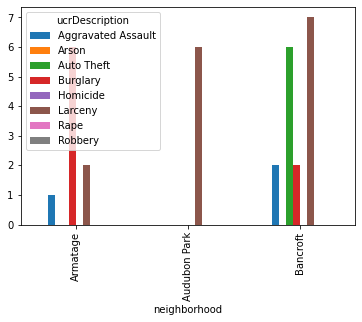

In [23]:
before_violent_agg[:24].unstack().plot.bar()

In [142]:
CALHOUN_ISLES = ["bryn-mawr", "cedar-isles-dean", "east bde maka ska", "east isles", "kenwood", "lowry hill", \
                 "lowry hill east", "south uptown", "west maka ska"]

CAMDEN = ["camden industrial", "cleveland", "folwell", "humboldt industrial area", "lind-bohanon", "mckinley", "shingle creek", "victory", "webber-camden"]

CENTRAL = ["downtown east", "downtown west", "elliot park", "loring park", "north loop", "stevens square-loring heights"]

LONGFELLOW = ["cooper", "hiawatha", "howe", "longfellow", "seward"]

NEAR_NORTH = ["harrison", "hawthorne", "jordan", "near-north", "sumner-glenwood", "willard-hay"]

NOKOMIS = ["diamond lake", "ericsson", "field", "hale", "keewaydin", "minnehaha", "morris park", \
           "northrop", "page", "regina", "wenonah"]

NORTHEAST = ["audubon park", "beltrami", "bottineau", "columbia park", "holland", "logan park", "marshall terrace", \
             "northeast park", "sheridan", "st. anthony east", "st. anthony west", "waite park", "windom park"]

PHILLIPS = ["east phillips", "midtown phillips", "phillips west", "ventura village"]

POWDERHORN = ["bancroft", "bryant", "central", "corcoran", "lyndale", "powderhorn park", "standish", "whittier"]

SOUTHWEST = ["armatage", "east harriet", "fulton", "kenny", "king field", "linden hills", "lynnhurst", "tangletown", "windom"]

UNIVERSITY = ["cedar-riverside", "como", "marcy-holmes", "mid-city industrial", "nicollet island-east bank", "prospect park-east river road", "university of minnesota"]

COMMUNITIES = ["CALHOUN_ISLES", "CAMDEN", "CENTRAL", "LONGFELLOW", "NEAR_NORTH", "NOKOMIS", "NORTHEAST", \
              "PHILLIPS", "POWDERHORN", "SOUTHWEST", "UNIVERSITY"]

In [143]:
df["neighborhood"] = df.neighborhood.str.lower()

In [144]:
df.head()

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear
8,9,armatage,Aggravated Assault,0.0,8,2017
9,10,armatage,Arson,0.0,8,2017
10,11,armatage,Auto Theft,1.0,8,2017
11,12,armatage,Burglary,3.0,8,2017
12,13,armatage,Homicide,0.0,8,2017


In [145]:
df["neighborhood"] = df["neighborhood"].replace("carag", "south uptown")
df["neighborhood"] = df["neighborhood"].replace("ecco", "east bde maka ska")
df["neighborhood"] = df["neighborhood"].replace("west calhoun", "west maka ska")

In [146]:
df["neighborhood"] = df["neighborhood"].replace("bryn - mawr", "bryn-mawr")
df["neighborhood"] = df["neighborhood"].replace("cedar - isles - dean", "cedar-isles-dean")
df["neighborhood"] = df["neighborhood"].replace("lind - bohanon", "lind-bohanon")
df["neighborhood"] = df["neighborhood"].replace("mid - city industrial", "mid-city industrial")
df["neighborhood"] = df["neighborhood"].replace("near - north", "near-north")
df["neighborhood"] = df["neighborhood"].replace("nicollet island - east bank", "nicollet island-east bank")
df["neighborhood"] = df["neighborhood"].replace("nicollet island/east bank", "nicollet island-east bank")

df["neighborhood"] = df["neighborhood"].replace("prospect park - east river road", "prospect park-east river road")
df["neighborhood"] = df["neighborhood"].replace("stevens square - loring heights", "stevens square-loring heights")
df["neighborhood"] = df["neighborhood"].replace("stevens square/loring heights", "stevens square-loring heights")
df["neighborhood"] = df["neighborhood"].replace("sumner - glenwood", "sumner-glenwood")
df["neighborhood"] = df["neighborhood"].replace("university", "university of minnesota")
df["neighborhood"] = df["neighborhood"].replace("webber - camden", "webber-camden")
df["neighborhood"] = df["neighborhood"].replace("willard - hay", "willard-hay")
df["neighborhood"] = df["neighborhood"].replace("steven's square - loring heights", "stevens square-loring heights")
df["neighborhood"] = df["neighborhood"].replace("cedar riverside", "cedar-riverside")

df["neighborhood"] = df["neighborhood"].replace("marcy holmes", "marcy-holmes")
df["neighborhood"] = df["neighborhood"].replace("king field", "king field")
df["neighborhood"] = df["neighborhood"].replace("prospect park", "prospect-park")


In [147]:
df.neighborhood.unique()

array(['armatage', 'audubon park', 'bancroft', 'beltrami', 'bottineau',
       'bryant', 'bryn-mawr', 'camden industrial', 'south uptown',
       'cedar-isles-dean', 'cedar-riverside', 'central', 'cleveland',
       'columbia park', 'como', 'cooper', 'corcoran', 'diamond lake',
       'downtown east', 'downtown west', 'east harriet', 'east isles',
       'east phillips', 'east bde maka ska', 'elliot park', 'ericsson',
       'field', 'folwell', 'fulton', 'hale', 'harrison', 'hawthorne',
       'hiawatha', 'holland', 'howe', 'humboldt industrial area',
       'jordan', 'keewaydin', 'kenny', 'kenwood', 'king field',
       'lind-bohanon', 'linden hills', 'logan park', 'longfellow',
       'loring park', 'lowry hill', 'lowry hill east', 'lyndale',
       'lynnhurst', 'marcy-holmes', 'marshall terrace', 'mckinley',
       'mid-city industrial', 'midtown phillips', 'minnehaha',
       'morris park', 'near-north', 'nicollet island-east bank',
       'north loop', 'northeast park', 'northrop'

In [148]:
df = df[  (df["neighborhood"] != "** not assigned **") ]
df = df[  (df["neighborhood"] != "z_** not assigned **") ]

In [149]:
df["neighborhood"].nunique()

87

In [150]:
df.neighborhood.unique()

array(['armatage', 'audubon park', 'bancroft', 'beltrami', 'bottineau',
       'bryant', 'bryn-mawr', 'camden industrial', 'south uptown',
       'cedar-isles-dean', 'cedar-riverside', 'central', 'cleveland',
       'columbia park', 'como', 'cooper', 'corcoran', 'diamond lake',
       'downtown east', 'downtown west', 'east harriet', 'east isles',
       'east phillips', 'east bde maka ska', 'elliot park', 'ericsson',
       'field', 'folwell', 'fulton', 'hale', 'harrison', 'hawthorne',
       'hiawatha', 'holland', 'howe', 'humboldt industrial area',
       'jordan', 'keewaydin', 'kenny', 'kenwood', 'king field',
       'lind-bohanon', 'linden hills', 'logan park', 'longfellow',
       'loring park', 'lowry hill', 'lowry hill east', 'lyndale',
       'lynnhurst', 'marcy-holmes', 'marshall terrace', 'mckinley',
       'mid-city industrial', 'midtown phillips', 'minnehaha',
       'morris park', 'near-north', 'nicollet island-east bank',
       'north loop', 'northeast park', 'northrop'

In [151]:
MPLS_CITIES = CALHOUN_ISLES + CAMDEN + CENTRAL + LONGFELLOW + NEAR_NORTH + NOKOMIS + NORTHEAST + \
              PHILLIPS + POWDERHORN + SOUTHWEST + UNIVERSITY
df_cities = df.neighborhood.unique()

In [152]:
for c in sorted(MPLS_CITIES):
    if c in df_cities:
        pass
    else:
        print(c)

In [155]:
sorted(MPLS_CITIES) == sorted(df_cities)

True

In [156]:
len(MPLS_CITIES)

87

In [157]:
len(df_cities)

87

In [158]:
print(sorted(MPLS_CITIES))

['armatage', 'audubon park', 'bancroft', 'beltrami', 'bottineau', 'bryant', 'bryn-mawr', 'camden industrial', 'cedar-isles-dean', 'cedar-riverside', 'central', 'cleveland', 'columbia park', 'como', 'cooper', 'corcoran', 'diamond lake', 'downtown east', 'downtown west', 'east bde maka ska', 'east harriet', 'east isles', 'east phillips', 'elliot park', 'ericsson', 'field', 'folwell', 'fulton', 'hale', 'harrison', 'hawthorne', 'hiawatha', 'holland', 'howe', 'humboldt industrial area', 'jordan', 'keewaydin', 'kenny', 'kenwood', 'king field', 'lind-bohanon', 'linden hills', 'logan park', 'longfellow', 'loring park', 'lowry hill', 'lowry hill east', 'lyndale', 'lynnhurst', 'marcy-holmes', 'marshall terrace', 'mckinley', 'mid-city industrial', 'midtown phillips', 'minnehaha', 'morris park', 'near-north', 'nicollet island-east bank', 'north loop', 'northeast park', 'northrop', 'page', 'phillips west', 'powderhorn park', 'prospect park-east river road', 'regina', 'seward', 'sheridan', 'shingle 

In [159]:
print(sorted(df_cities))

['armatage', 'audubon park', 'bancroft', 'beltrami', 'bottineau', 'bryant', 'bryn-mawr', 'camden industrial', 'cedar-isles-dean', 'cedar-riverside', 'central', 'cleveland', 'columbia park', 'como', 'cooper', 'corcoran', 'diamond lake', 'downtown east', 'downtown west', 'east bde maka ska', 'east harriet', 'east isles', 'east phillips', 'elliot park', 'ericsson', 'field', 'folwell', 'fulton', 'hale', 'harrison', 'hawthorne', 'hiawatha', 'holland', 'howe', 'humboldt industrial area', 'jordan', 'keewaydin', 'kenny', 'kenwood', 'king field', 'lind-bohanon', 'linden hills', 'logan park', 'longfellow', 'loring park', 'lowry hill', 'lowry hill east', 'lyndale', 'lynnhurst', 'marcy-holmes', 'marshall terrace', 'mckinley', 'mid-city industrial', 'midtown phillips', 'minnehaha', 'morris park', 'near-north', 'nicollet island-east bank', 'north loop', 'northeast park', 'northrop', 'page', 'phillips west', 'powderhorn park', 'prospect park-east river road', 'regina', 'seward', 'sheridan', 'shingle 

In [160]:
oddballs = [x for x in (MPLS_CITIES + df_cities.tolist()) if x not in MPLS_CITIES or x not in df_cities]
print(oddballs)

[]
